In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq 
from scipy import signal
from scipy.fft import fftshift 

# load data

In [24]:
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Blinking.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/TU Delft/BAP/Measurements/Physcial clincing right forearm.csv", sep=",")
df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt/EEGdata-2024-156--14-51-06.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt_ICA/EEGdata-2024-150--15-36-40_ICA.csv", sep=",")
#df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_Test/Label0Test.csv", sep=",")
#df = pd.read_csv('C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt_ICA/EEGdata-2024-144--15-54-35_ICA.csv', sep = ",")
end = df.shape[0] - 5
fs = 250
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data
df

,FZ,C3,CZ,C4,PZ,PO7,OZ,PO8
0,224036.734375,246562.906250,244368.765625,248482.484375,219260.250000,243012.828125,203670.625000,231048.921875
1,223995.156250,246396.171875,243740.953125,248402.281250,218695.921875,242708.750000,203304.765625,230787.218750
2,224012.046875,246368.093750,243629.375000,248410.687500,218577.187500,242630.703125,203221.359375,230746.546875
3,224062.750000,246517.406250,244193.093750,248495.625000,219070.625000,242884.437500,203536.687500,230988.656250
4,224074.546875,246635.859375,244658.718750,248539.875000,219498.609375,243113.765625,203815.546875,231176.421875
...,...,...,...,...,...,...,...,...
71995,223903.062500,245753.593750,242786.359375,244142.218750,219737.859375,241354.859375,202599.890625,229920.875000
71996,223848.625000,245635.937500,242342.812500,244063.171875,219357.890625,241159.781250,202357.140625,229731.328125
71997,223813.296875,245488.859375,241787.234375,243994.343750,218864.093750,240885.296875,202026.078125,229506.734375
71998,223841.015625,245510.953125,241878.781250,244031.437500,218935.171875,240909.265625,202059.953125,229555.468750


# plot raw signals

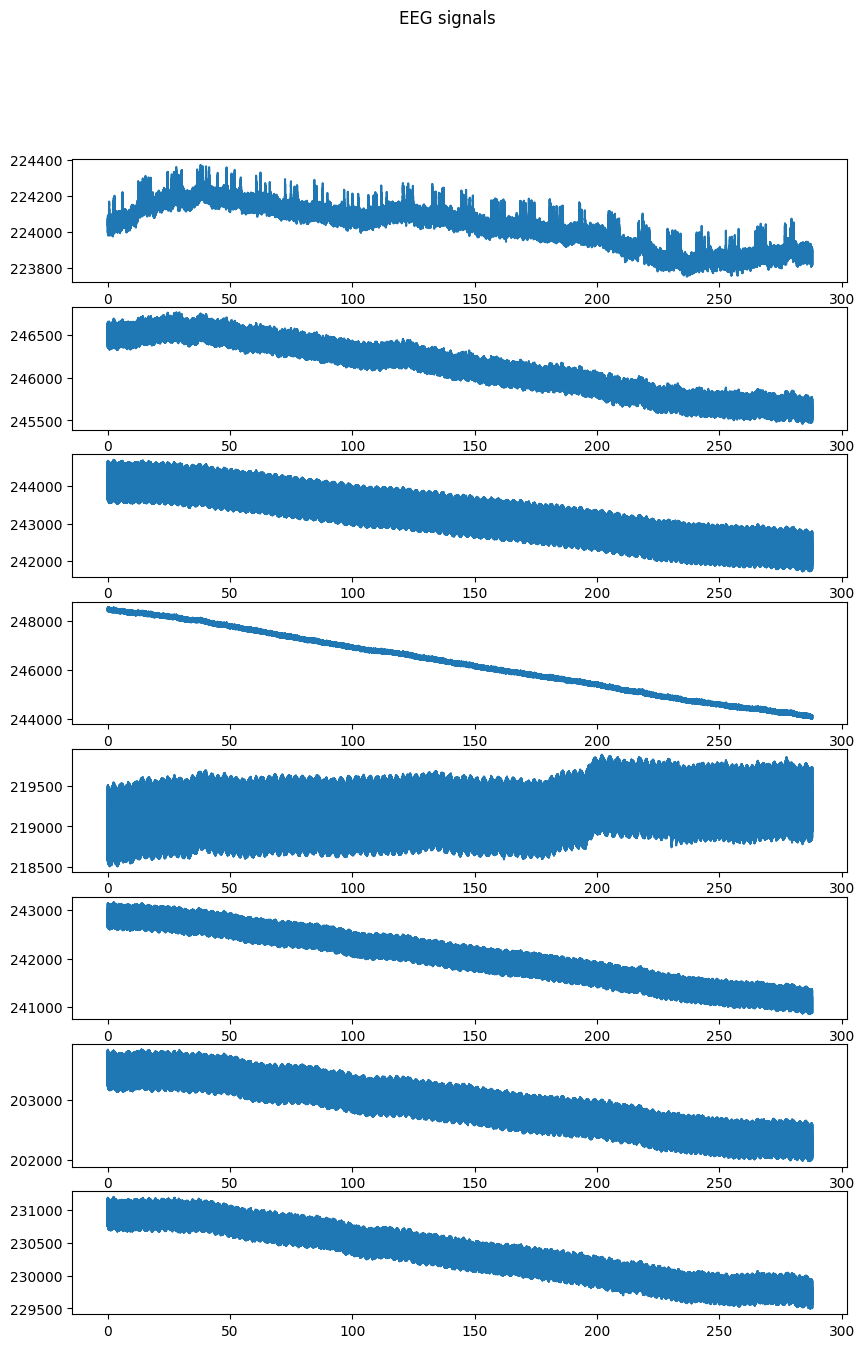

In [25]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals')
for i in range(8):
    axs[i].plot(x1[:],df.iloc[:,i])

# Detrend signals

In [28]:
# Define the segment size
prompt_size = 1500
prompts = end/prompt_size

# Apply detrending to each prompt section. Each 6 seconds (1500 samples)
for i in range(int(prompts)):
    df.iloc[1500*i : 1500*(i+1)] = signal.detrend(df.iloc[1500*i : 1500*(i+1)], axis = 0, type='linear')

df_filt_detr = np.array(df)

df = pd.read_csv("C:/Users/JackC/Documents/GitHub/EEGcontroller/MeasurementSubgroup/Our_measurements/Measurement_prompt/EEGdata-2024-156--14-51-06.csv", sep=",")
df = df.iloc[:end, :8] # 3000 samples is 12 seconds of data


# Apply filters

In [29]:
from scipy.signal import butter, lfilter, lfilter_zi, freqz, tf2zpk
from scipy import signal

# Define the filter parameters
lowcut = 8
highcut = 30
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Apply the filter to each column of the DataFrame
df_filt = lfilter(b, a, df_filt_detr, axis = 0)

# Define the filter parameters
lowcut = 49
highcut = 51
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='bandstop')

# Apply the filter to each column of the DataFrame
df_filt1 = lfilter(b, a, df_filt, axis = 0)

# # import scipy.signal as signal

# # Define the notch filter parameters
# fs = 250  # Sampling frequency
# f0 = 50  # Notch frequency
# Q = 1 # Quality factor

# # Design the notch filter
# b, a = signal.iirnotch(f0, Q, fs)

# Apply the filter to each column of the DataFrame
#df_filt1 = lfilter(b, a, df_filt, axis = 0)

# plot raw, detrended and filtered signal

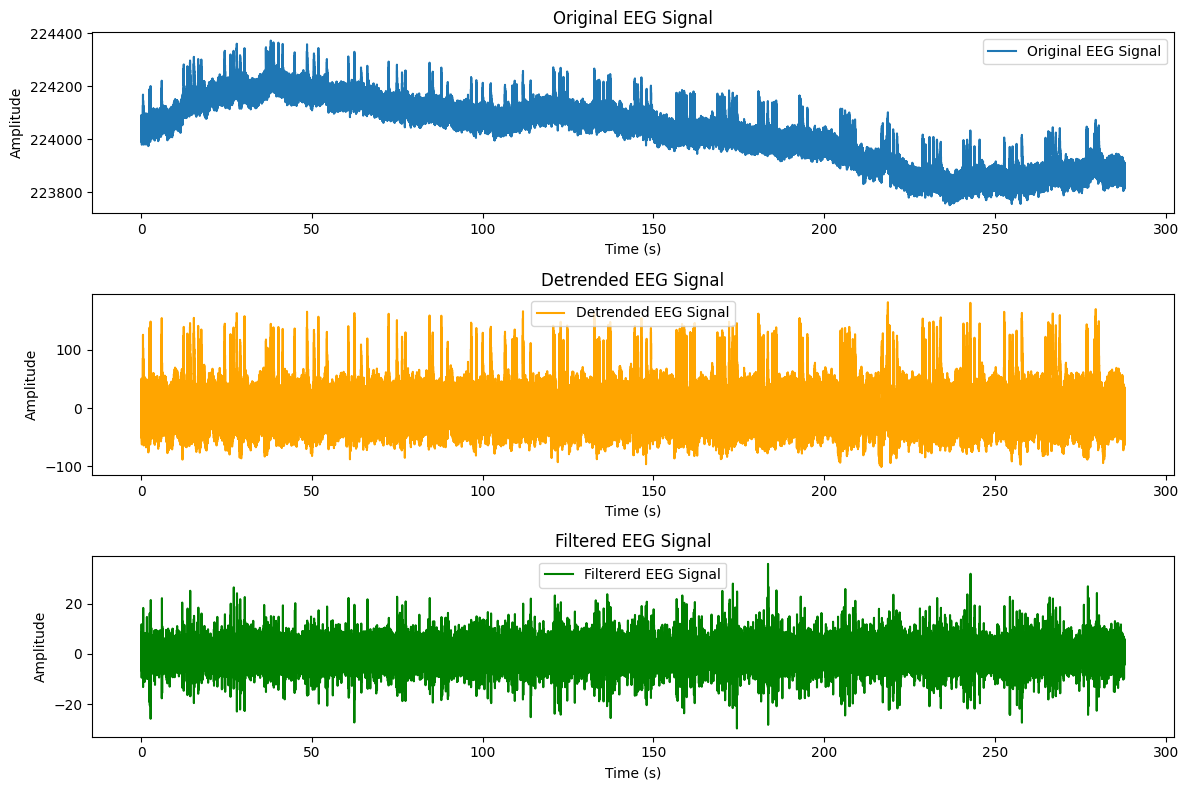

In [31]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

# Plotting the original and detrended EEG signals
plt.figure(figsize=(12, 8))

# Plot original EEG signal
plt.subplot(3, 1, 1)
plt.plot(x1, df.iloc[:,0], label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
# Plot detrended EEG signal
plt.subplot(3, 1, 2)
plt.plot(x1, df_filt_detr[:,0], label='Detrended EEG Signal', color='orange')
plt.title('Detrended EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot detrended EEG signal
plt.subplot(3, 1, 3)
plt.plot(x1, df_filt1[:,0], label='Filtererd EEG Signal', color='Green')
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


# Z-plane

## Set bandpass filter

In [17]:
# Define the filter parameters
lowcut = 0.5
highcut = 38
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(8, [low, high], btype='bandstop')

## Set notch filter

In [18]:
# Define the filter parameters
lowcut = 49
highcut = 51
fs = 250  # Sampling frequency

# Calculate the filter coefficients
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(8, [low, high], btype='bandstop')


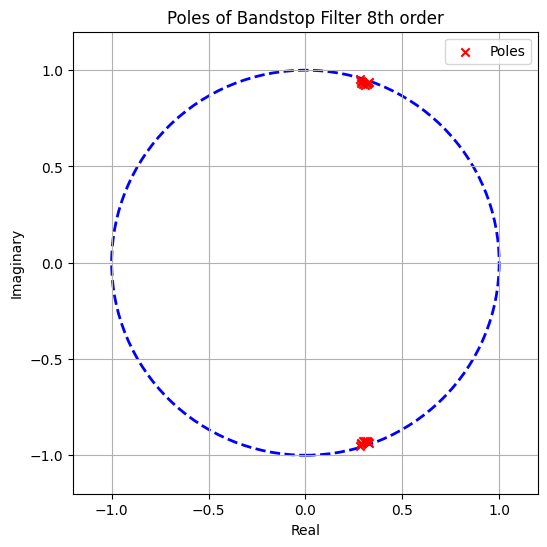

In [19]:
# Plot the poles and zeros on the complex plane
plt.figure(figsize=(6, 6))
plt.title('Poles of Bandstop Filter 8th order')

# Compute the poles and zeros
poles = np.roots(a)
#zeros = np.roots(b)

# Plot the unit circle for reference
unit_circle = plt.Circle((0,0), 1, fill=False, color='blue', linestyle='dashed', linewidth=2)
plt.gca().add_artist(unit_circle)

# Plot the poles and zeros
plt.scatter(poles.real, poles.imag, marker='x', color='red', label='Poles')
#plt.scatter(zeros.real, zeros.imag, marker='o', color='green', facecolors='none', label='Zeros')

# Set plot limits
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])

# Add axis labels and legend
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.grid(True)
plt.show()

# Frequency reponses

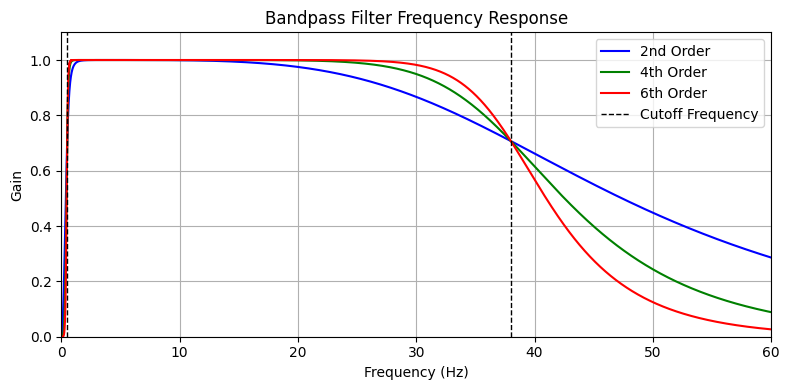

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Define the filter parameters
lowcut = 0.5
highcut = 38
fs = 250  # Sampling frequency

# Function to compute frequency response
def plot_filter_response(order, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandpass')
    w, h = freqz(b, a, worN=8000)
    return w, h

# Compute the frequency responses for 2nd and 6th order filters
w2, h2 = plot_filter_response(2, lowcut, highcut, fs)
w4, h4 = plot_filter_response(4, lowcut, highcut, fs)
w6, h6 = plot_filter_response(6, lowcut, highcut, fs)

# Plot the frequency responses
plt.figure(figsize=(8,4))

plt.plot(0.5 * fs * w2 / np.pi, np.abs(h2), 'b', label='2nd Order')
plt.plot(0.5 * fs * w2 / np.pi, np.abs(h4), 'g', label='4th Order')
plt.plot(0.5 * fs * w6 / np.pi, np.abs(h6), 'r', label='6th Order')

# Add cutoff frequency lines
plt.axvline(lowcut, color='k', linestyle='--', linewidth=1, label='Cutoff Frequency')
plt.axvline(highcut, color='k', linestyle='--', linewidth=1)

plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim(0, 60)
plt.ylim(0, 1.1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


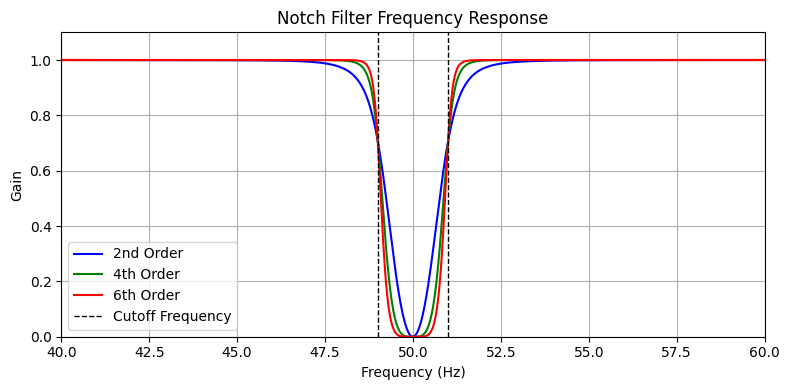

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

# Define the filter parameters
lowcut = 49
highcut = 51
fs = 250  # Sampling frequency

# Function to compute frequency response
def plot_filter_response(order, lowcut, highcut, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    w, h = freqz(b, a, worN=8000)
    return w, h

# Compute the frequency responses for 2nd and 6th order filters
w2, h2 = plot_filter_response(2, lowcut, highcut, fs)
w4, h4 = plot_filter_response(4, lowcut, highcut, fs)
w6, h6 = plot_filter_response(6, lowcut, highcut, fs)

# Plot the frequency responses
plt.figure(figsize=(8,4))

plt.plot(0.5 * fs * w2 / np.pi, np.abs(h2), 'b', label='2nd Order')
plt.plot(0.5 * fs * w2 / np.pi, np.abs(h4), 'g', label='4th Order')
plt.plot(0.5 * fs * w6 / np.pi, np.abs(h6), 'r', label='6th Order')

# Add cutoff frequency lines
plt.axvline(lowcut, color='k', linestyle='--', linewidth=1, label='Cutoff Frequency')
plt.axvline(highcut, color='k', linestyle='--', linewidth=1)

plt.title('Notch Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.xlim(40, 60)
plt.ylim(0, 1.1)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# Plot filtered signals

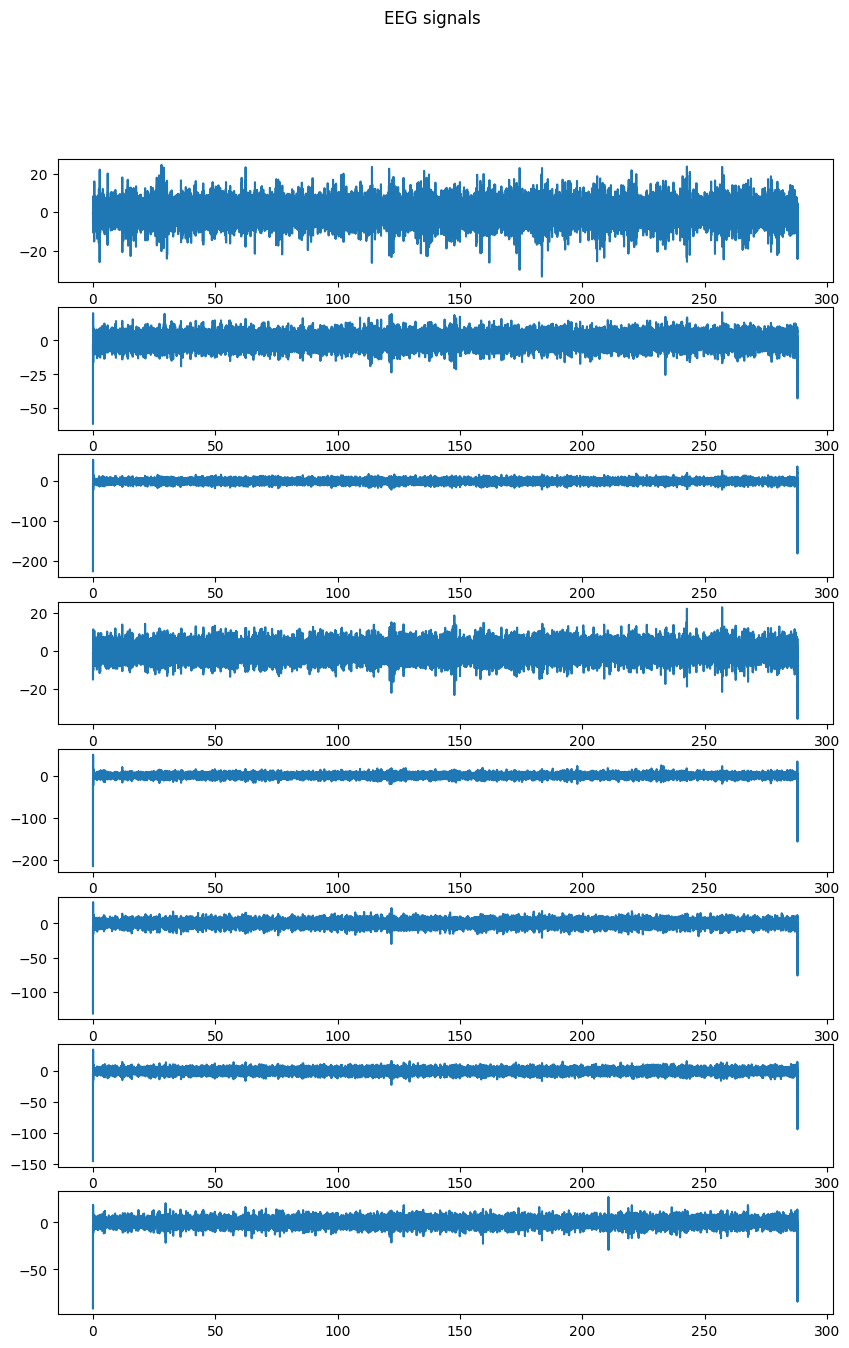

In [20]:
x1 = np.linspace(0, end/fs, end, endpoint=True)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals')
for i in range(8):
    axs[i].plot(x1,df_filt1[:,i])

# Plot one FFT

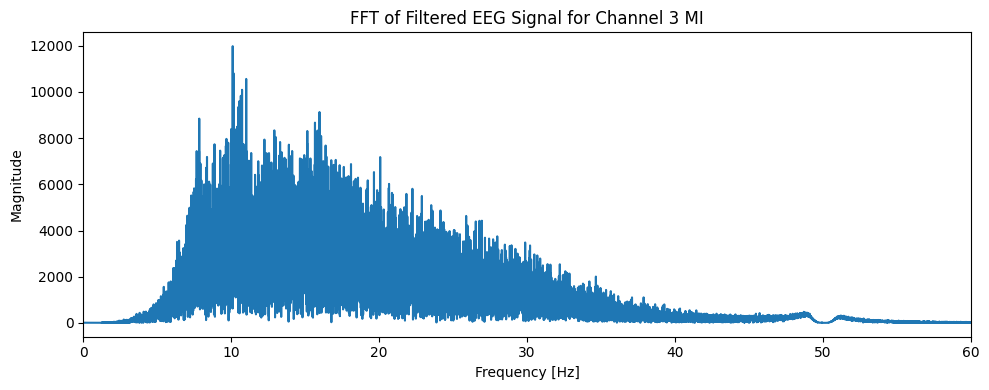

In [12]:
# xf = rfftfreq(end, 1 / fs)

# # Compute the FFT for channel 3 (index 2 in zero-indexed Python)
# channel = 3
# yf = rfft(df_filt1[:, channel-1])

# # Create a plot for the FFT of the filtered EEG signal
# plt.figure(figsize=(10, 4))
# plt.plot(xf, np.abs(yf))
# plt.title('FFT of Filtered EEG Signal for Channel 3 MI')
# plt.xlim([0, 60])
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Magnitude')
# plt.locator_params(axis='x', nbins=10)
# plt.tight_layout()
# plt.show()
# plt.show()

# FFt of raw and filtered signal

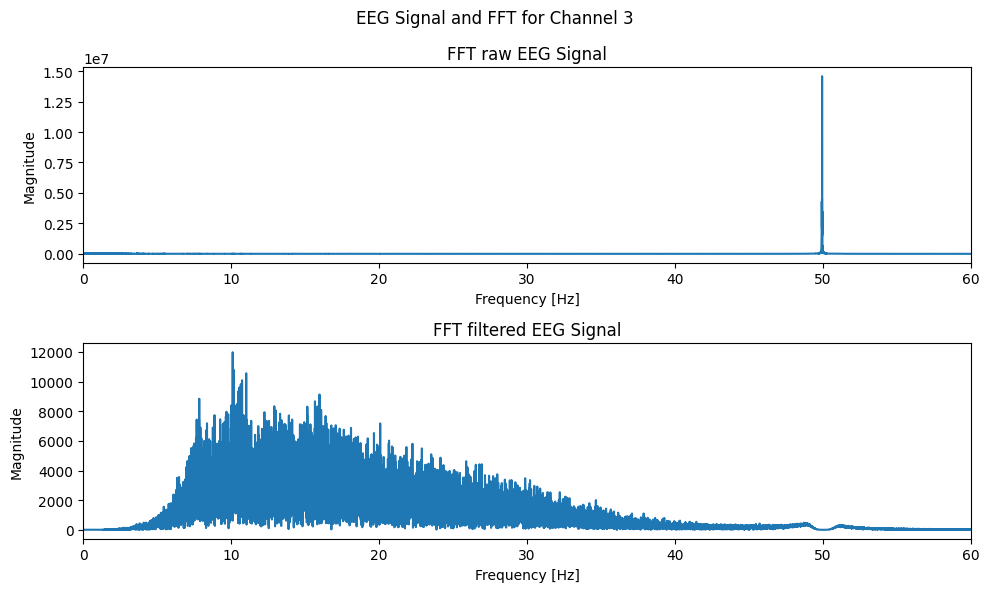

In [13]:
# # Calculate the frequency bins for the FFT
# xf = rfftfreq(end, 1 / fs)

# # Compute the FFT for channel 3 (index 2)
# channel = 3
# yf1  = rfft(df_filt_detr[:, channel-1])
# yf = rfft(df_filt1[:, channel-1])

# # Create a subplot with 2 rows: one for the raw signal and one for the FFT
# fig, axs = plt.subplots(2, 1, figsize=(10, 6))
# fig.suptitle('EEG Signal and FFT for Channel 3')

# # Plot the raw EEG signal
# axs[0].plot(xf, np.abs(yf1))
# axs[0].set_title('FFT raw EEG Signal')
# axs[0].set_xlim([0, 60])
# # Setting the number of ticks
# axs[0].locator_params(axis='x', nbins=10)
# axs[0].set_xlabel('Frequency [Hz]')
# axs[0].set_ylabel('Magnitude')
# # Plot the FFT of the EEG signal
# axs[1].plot(xf, np.abs(yf))
# axs[1].set_title('FFT filtered EEG Signal')
# axs[1].set_xlim([0, 60])
# # Setting the number of ticks
# axs[1].locator_params(axis='x', nbins=10)
# axs[1].set_xlabel('Frequency [Hz]')
# axs[1].set_ylabel('Magnitude')
# plt.tight_layout()
# plt.show()

# FFT plots of 8 channels

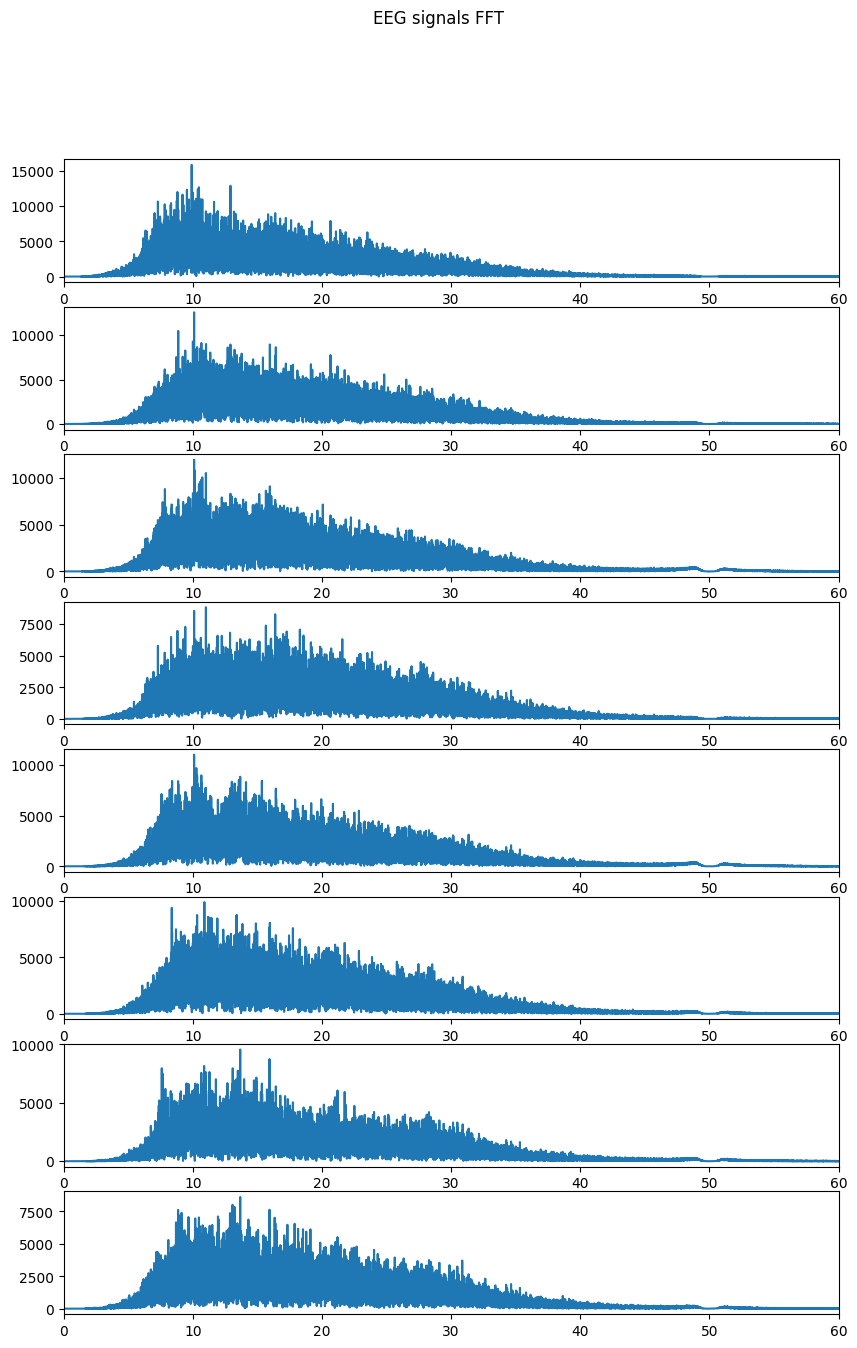

In [14]:
# Frequency axis
xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals FFT')
for i in range(8):
    yf = rfft(df_filt1[:,i])
    axs[i].plot(xf, np.abs(yf))
    axs[i].set_xlim([0, 60])
    # Setting the number of ticks 
    axs[i].locator_params(axis='x', nbins=10)
    

# PSD of 8 channels

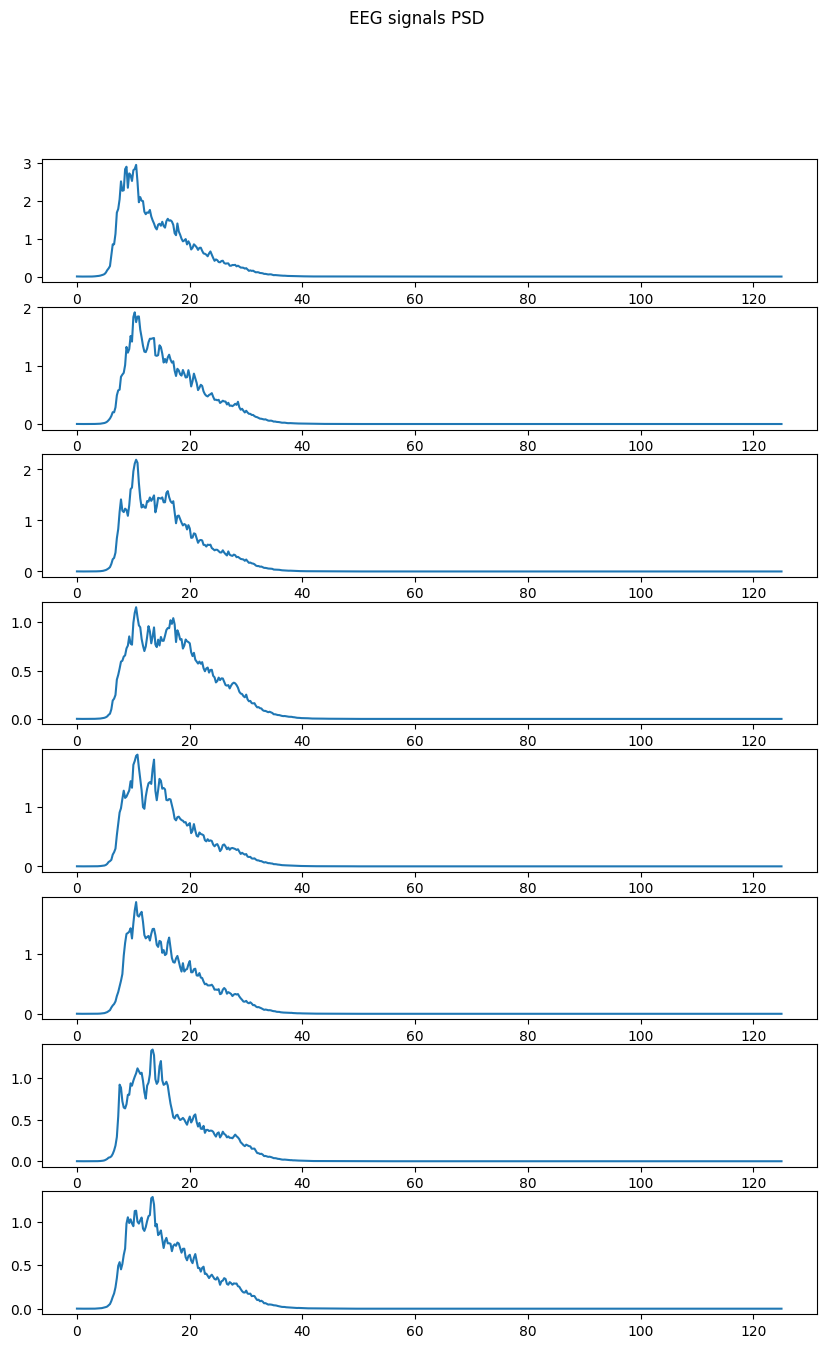

In [15]:
from scipy import signal

xf = rfftfreq(end, 1 / fs)

fig, axs = plt.subplots(8, figsize=(10 , 15))
fig.suptitle('EEG signals PSD')
for i in range(8):
    # Compute the power spectral density
    frequencies, power_density = signal.welch(df_filt1[:,i], fs, nperseg=1024, scaling='density')


    # Plot the power spectral density
    axs[i].plot(frequencies, power_density)
    #plt.psd(df[:,i], Fs = 250)
    #axs[i].xlabel('Frequency (Hz)')
    #axs[i].ylabel('Power Spectral Density')
    #axs[i].title('Power Spectral Density Plot')


